# Home Work- Leo Fajri - Titanic

In [1]:
#import pandas
import pandas as pd

Import Data

In [2]:
#import FIle CSV
df=pd.read_csv('train.csv')

In [3]:
#check data set
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#check data shape
df.shape

(891, 12)

In [5]:
#Check data information,if there is null 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#check total Null
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#import matplot library for visualization
import matplotlib.pyplot as plt

1. Menampilkan jumlah penumpang yang meninggal dan yang selamat

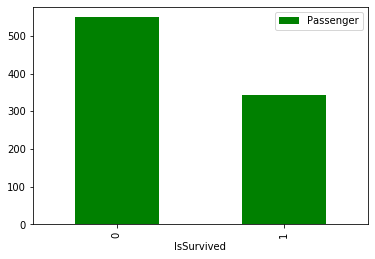

In [103]:
df.Survived.value_counts()
survive= df.Survived.value_counts().reset_index(name='Passenger')
survive=survive.rename(columns={'index': 'IsSurvived'})
survive.plot.bar(x='IsSurvived', y='Passenger',color='green')
plt.savefig('Survival.png');

Terlihat lebih banyak yang meninggal dibanidng yang selamat

2. Menampilkan jumlah penumpang masing2 tiket class

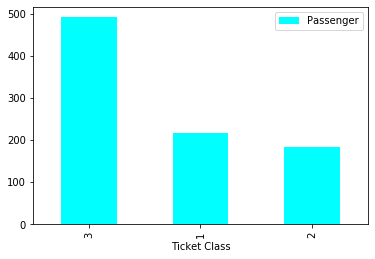

In [105]:
df.Pclass.value_counts()
pclass= df.Pclass.value_counts().reset_index(name='Passenger')
pclass=pclass.rename(columns={'index': 'Ticket Class'})
pclass.plot.bar(x='Ticket Class', y='Passenger',color='Cyan')
plt.savefig('Ticketclass.png');

Paling banyak penumpang berada di kelas 3 danpaling sedikit dikelas 2

3.Menampilkan jumlah penumpang pria dan wanita

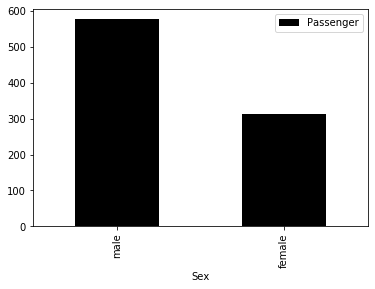

In [107]:
df.Sex.value_counts()
sex= df.Sex.value_counts().reset_index(name='Passenger')
sex=sex.rename(columns={'index': 'Sex'})
sex.plot.bar(x='Sex', y='Passenger',color='black')
plt.savefig('passenger_Sex.png');

In [ ]:
Lebih banyak penumpang pria dibanding wanita

4. Menganalisa penumpang yang selamat dan yang meninggal berdasarkan beberapa parameter

In [12]:
#Membuat fungsi untuk menampilkan bar chart dari parameter yg diinput
def bar_chart(parameter):
    survived=df[df['Survived']==1][parameter].value_counts()
    dead=df[df['Survived']==0][parameter].value_counts()
    bar=pd.DataFrame([survived,dead])
    bar.index=["Survived","Dead"]
    bar.plot(kind='bar',figsize=(8,5))
 

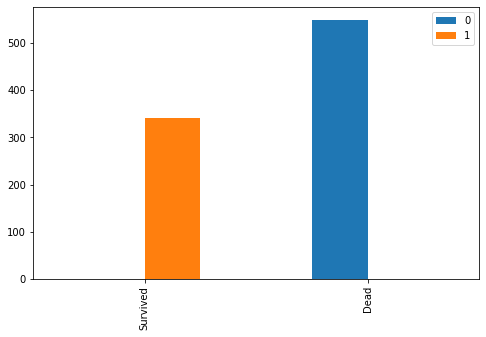

In [108]:
bar_chart("Survived")
plt.savefig('Survived.png');

Lebih banyak yang mati dibanding yang selamat

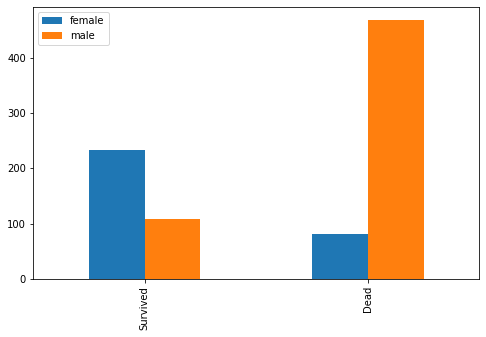

In [109]:
bar_chart("Sex")
plt.savefig('Sex.png');

Lebih banyak perempuan yang selamat dibanding pria

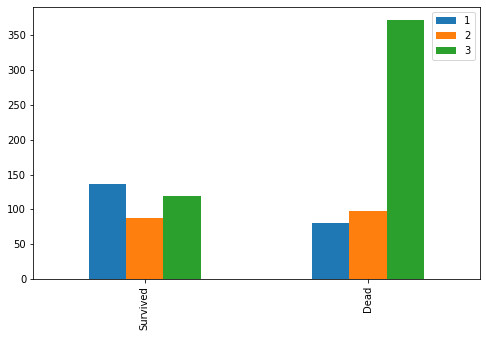

In [110]:
bar_chart("Pclass")
plt.savefig('Pclass.png');

Paling banyak survived adalah dari tiket 1st class sedangkan paling banyak meninggal adalah pemegang tiket 3rd class

In [16]:
#Membuat fungsi untuk menampilkan stacked bar chart dari parameter yg diinput
def stacked_bar_chart(parameter):
    survived=df[df['Survived']==1][parameter].value_counts()
    dead=df[df['Survived']==0][parameter].value_counts()
    bar=pd.DataFrame([survived,dead])
    bar.index=["Survived","Dead"]
    bar.plot(kind='bar',stacked=True,figsize=(8,5))


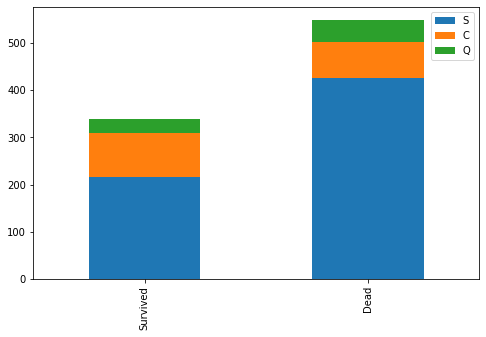

In [111]:
stacked_bar_chart('Embarked')
plt.savefig('SEmbarked.png');

Penumpang di embarked S dan Q lebih banyak yang meninggal dibanding yang selamat , sedangkan penumpang di embarked C lebih banyak yang survived

    Data Cleansing

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
#Mencari nilai median umur
df['Age'].median()

28.0

In [32]:
# mengisi nilai umur yang kosong dengan nilai median
df['Age']=df['Age'].fillna(df['Age'].median())

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Passanger Age')

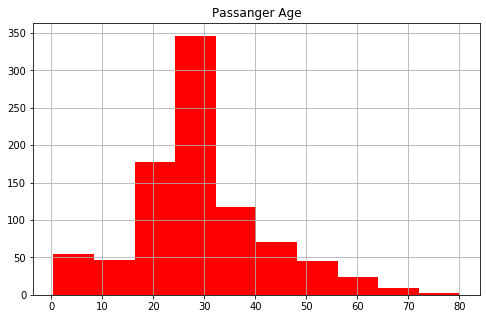

In [58]:
df.Age.hist(figsize=(8,5),color='red')
plt.title('Passanger Age')
#plt.xlabel('Age')
#plt.ylabel('Total Passange')


Paling banyak penumpang berumur 28 tahun


In [91]:
dead_age=df[df['Survived']==0]['Age']
survived_age=df[df['Survived']==1]['Age']

Text(0.5, 1.0, 'Passanger Age')

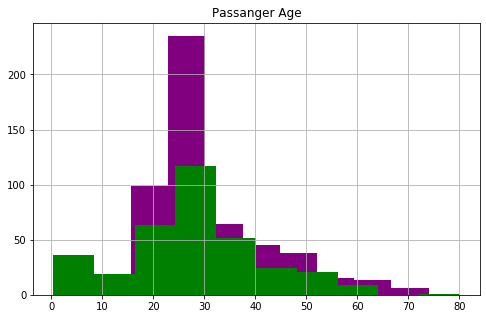

In [94]:
dead_age.hist(figsize=(8,5),color='purple')
survived_age.hist(figsize=(8,5),color='green')
plt.title('Passanger Age')
#plt.xlabel('Age')
#plt.ylabel('Total Passange')

Usia muda paling banyak meninggal , anak2 lebih banyak yang selamat